Adapted from: https://docs.pymc.io/notebooks/getting_started.html

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
from numpy.random import RandomState

from util.defs import *

sns.set_palette("colorblind")
sns.set_style("darkgrid")

In [2]:
rand_seed=123
rand = RandomState(seed=rand_seed)

In [3]:
# True model parameters
b = 1
eps = 1
w = np.array([1, 2.5])

# Parameters for simulated data
mus = np.zeros(2)
sigmas = np.array([1, 0.2])
N = 100

# Functions

In [4]:
def sim_train_data(N: int, w: ndarray, b, mus: ndarray, sigmas: ndarray, eps: float, 
                rand: RandomState) -> Tuple[ndarray, ndarray]:
    X = rand.normal(mus, sigmas, (N, len(w)))
    # Xw + b + noise
    Y = (X @ w)[:, np.newaxis] + b + rand.normal(size=(N, 1)) * eps
    return X, Y

# Bayesian Linear Regression

## Generate data

In [5]:
X, Y = sim_train_data(N, w, b, mus, sigmas, eps, rand)

## Visualize simulated data

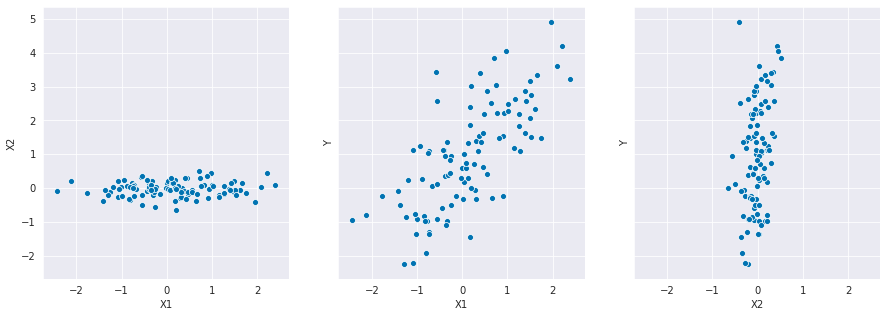

In [6]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=axes[0])
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")

sns.scatterplot(x=X[:, 0], y=Y.squeeze(), ax=axes[1])
axes[1].set_xlabel("X1")
axes[1].set_ylabel("Y")

sns.scatterplot(x=X[:, 1], y=Y.squeeze(), ax=axes[2])
axes[2].set_xlabel("X2")
axes[2].set_ylabel("Y")


plt.show()

## Define model

In [7]:
with pm.Model() as linear_model:
    # Priors for unknown parameters
    bias = pm.Normal("bias", mu=0, sigma=10)
    weights = pm.Normal("weights", mu=0, sigma=10, shape=2)
    epsilon = pm.HalfNormal("epsilon", sigma=1)
    
    # Expected value of outcome (i.e. linear function)
    mu = (X @ weights)[:, np.newaxis] + bias
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=epsilon, observed=Y)

## Fit model

In [8]:
map_est = pm.find_MAP(model=linear_model)
map_est

logp = -155.36, ||grad|| = 12.881: 100%|██████████| 20/20 [00:00<00:00, 2530.27it/s]  


{'bias': array(0.88424182),
 'weights': array([1.10407373, 2.21914399]),
 'epsilon_log__': array(-0.04266357),
 'epsilon': array(0.95823371)}